In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Tis is a simple script to demonstrate the use of pandas, numpy, seaborn, and matplotlib.
#It creates a DataFrame, performs some basic operations, and visualizes the data.
df=pd.read_csv(r"C:\Users\tadde\Desktop\Pandas\sample_ecommerce_data.csv")

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            5 non-null      int64  
 1   user_id             5 non-null      int64  
 2   order_value         5 non-null      float64
 3   product_id          5 non-null      object 
 4   session_id          5 non-null      object 
 5   date                5 non-null      object 
 6   added_to_cart       5 non-null      bool   
 7   completed_checkout  5 non-null      bool   
dtypes: bool(2), float64(1), int64(2), object(3)
memory usage: 378.0+ bytes


In [10]:
df.describe()

,order_id,user_id,order_value
count,5.000000,5.000000,5.000000
mean,103.000000,3.000000,53.996000
std,1.581139,1.581139,53.663675
min,101.000000,1.000000,0.000000
25%,102.000000,2.000000,0.000000
50%,103.000000,3.000000,59.990000
75%,104.000000,4.000000,89.990000
max,105.000000,5.000000,120.000000


In [11]:
df.head()

,order_id,user_id,order_value,product_id,session_id,date,added_to_cart,completed_checkout
0,101,1,89.99,A1,S1,2025-07-01,True,True
1,102,2,0.00,A2,S2,2025-07-01,True,False
2,103,3,120.00,A3,S3,2025-07-02,False,False
3,104,4,59.99,A4,S4,2025-07-02,True,True
4,105,5,0.00,A2,S5,2025-07-03,True,False


In [12]:
df.tail()

,order_id,user_id,order_value,product_id,session_id,date,added_to_cart,completed_checkout
0,101,1,89.99,A1,S1,2025-07-01,True,True
1,102,2,0.00,A2,S2,2025-07-01,True,False
2,103,3,120.00,A3,S3,2025-07-02,False,False
3,104,4,59.99,A4,S4,2025-07-02,True,True
4,105,5,0.00,A2,S5,2025-07-03,True,False


In [14]:
total_sessions = df['session_id'].nunique()
print(f"Total unique sessions: {total_sessions}")

Total unique sessions: 5


In [18]:
# Total users
total_users = df['user_id'].nunique()
print(f"Total unique users:",total_users)

Total unique users: 5


In [19]:
# Total orders (non-zero order value)
total_orders = df[df['order_value'] > 0].shape[0]
print("Total orders:" ,total_orders)

Total orders: 3


In [24]:
# Total revenue
total_revenue = df['order_value'].sum()
print("Total revenue:",total_revenue)

Total revenue: 269.98


In [28]:
# Total orders (non-zero order value)
total_orders = df[df['order_value'] > 0].shape[0]
print("Total orders:", total_orders)

Total orders: 3


In [30]:
# AOV (Average Order Value)
aov = total_revenue / total_orders if total_orders else 0
print("Average Order Value (AOV):", aov)




Average Order Value (AOV): 89.99333333333334


In [31]:
# Conversion rate
conversion_rate = total_orders / total_sessions * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 60.00%


In [32]:
# Add-to-cart rate
add_to_cart_rate = df['added_to_cart'].sum() / total_sessions * 100
print(f"Add-to-Cart Rate: {add_to_cart_rate:.2f}%")

Add-to-Cart Rate: 80.00%


In [33]:
# Cart abandonment rate
cart_abandoned = df[(df['added_to_cart']) & (~df['completed_checkout'])].shape[0]
cart_abandonment_rate = cart_abandoned / df['added_to_cart'].sum() * 100
print(f"Cart Abandonment Rate: {cart_abandonment_rate:.2f}%")

Cart Abandonment Rate: 50.00%


In [ ]:
# Print results for verification
print(f"Total Sessions: {total_sessions}")
print(f"Total Orders: {total_orders}")
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"AOV: ${aov:.2f}")
print(f"Conversion Rate: {conversion_rate:.2f}%")
print(f"Add-to-Cart Rate: {add_to_cart_rate:.2f}%")
print(f"Cart Abandonment Rate: {cart_abandonment_rate:.2f}%")

Total Sessions: 5
Total Orders: 3
Total Revenue: $269.98
AOV: $89.99
Conversion Rate: 60.00%
Add-to-Cart Rate: 80.00%
Cart Abandonment Rate: 50.00%


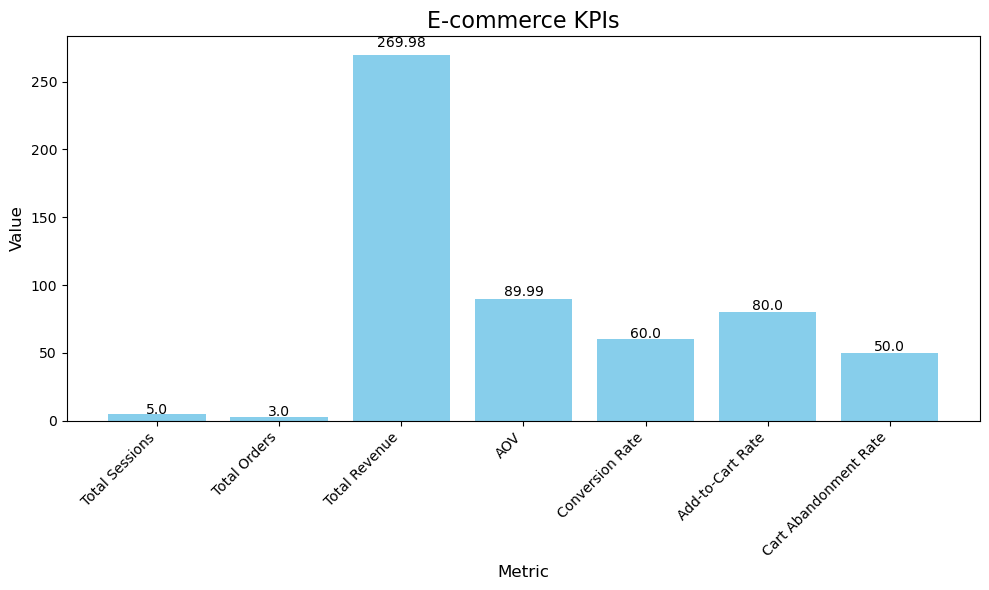

In [3]:

data = {
    'Metric': [
        'Total Sessions',
        'Total Orders',
        'Total Revenue',
        'AOV',
        'Conversion Rate',
        'Add-to-Cart Rate',
        'Cart Abandonment Rate'
    ],
    'Value': [
        5,
        3,
        269.98,
        89.99,
        60.00,
        80.00,
        50.00
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Metric'], df['Value'], color='skyblue')

# Add labels and title
plt.title('E-commerce KPIs', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels above bars
for i, v in enumerate(df['Value']):
    plt.text(i, v + (v * 0.02), f"{v}", ha='center', fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()